In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")


In [3]:
print(df.head())  # shows the first 5 rows


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


In [5]:
# Select features (you can choose relevant columns)
X = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]

# Target variable
y = df['stroke']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Step 6: Train Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [8]:
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)

print("Predictions:", y_pred)
print("Model Accuracy:", accuracy)


Predictions: [0 0 0 ... 1 0 1]
Model Accuracy: 0.9119373776908023


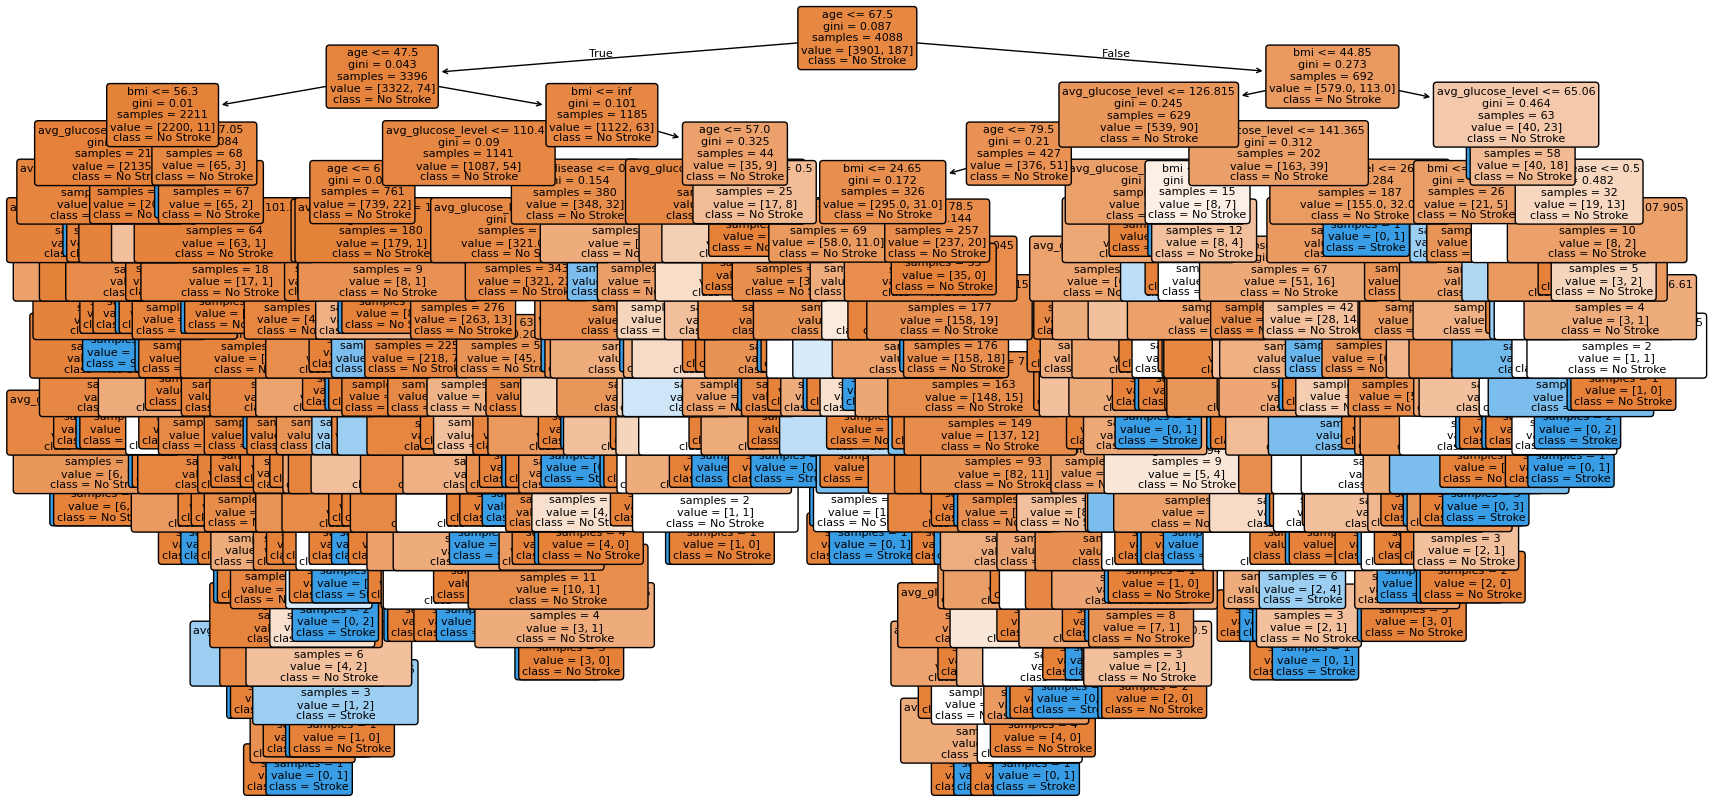

In [9]:
plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["No Stroke", "Stroke"],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.show()

In [10]:
df.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
df.dropna() 


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [12]:
df.duplicated().sum()


np.int64(0)

In [13]:
df['age'] = df['age'].astype(int)


In [14]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.215264,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.633866,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [19]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


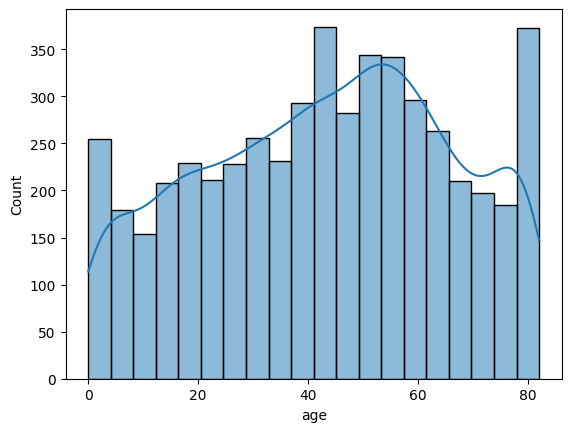

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['age'], kde=True)
plt.show()


<Axes: xlabel='gender', ylabel='count'>

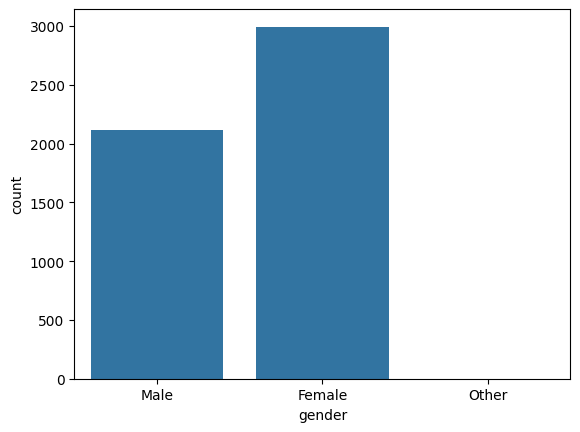

In [21]:
df['gender'].value_counts()
sns.countplot(x='gender', data=df)


<Axes: >

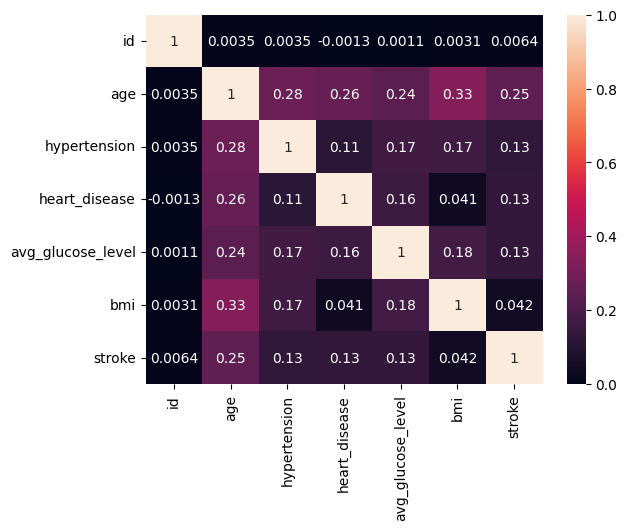

In [22]:
numeric_df = df.select_dtypes(include='number')  # select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True)


In [23]:
df.select_dtypes(include='object').columns


Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [24]:
# Gender
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})

# Ever married
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})

# Work type
df['work_type'] = df['work_type'].map({
    'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4
})

# Residence type
df['Residence_type'] = df['Residence_type'].map({'Urban': 0, 'Rural': 1})

# Smoking status
df['smoking_status'] = df['smoking_status'].map({
    'never smoked': 0, 'formerly smoked': 1, 'smokes': 2, 'Unknown': 3
})


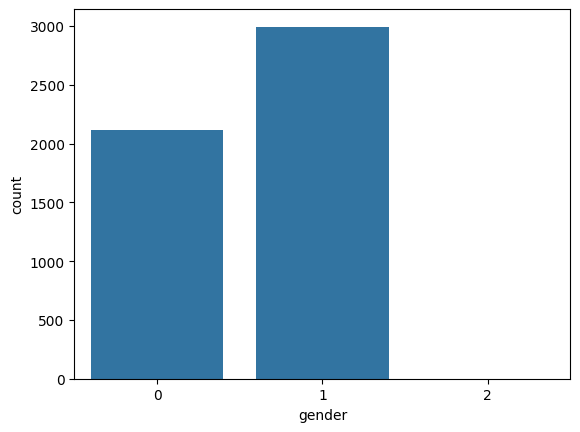

In [25]:
# Countplots for categorical variables
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='gender', data=df)
plt.show()


In [27]:
!pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


In [28]:
import os
import cv2
import numpy as np
from PIL import Image
from IPython.display import display, Markdown

In [29]:
DATA_DIR = 'data'
OUTPUT_DIR = 'processed_data'
TARGET_SIZE = (800, 1000) # Standardize all images to this size (width, height)

In [30]:
# Create output directory if it doesn't exist
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)
    print(f"Created output directory: {OUTPUT_DIR}")

In [33]:

def preprocess_image(image_path, target_size=TARGET_SIZE):
   
    try:
        
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        if img is None:
            print(f"⚠️ Error loading image: {image_path}. Skipping.")
            return None

        img_resized = cv2.resize(img, target_size, interpolation=cv2.INTER_AREA)

        
        gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
        
        
        denoised = cv2.GaussianBlur(gray, (5, 5), 0)
        

        processed_img = cv2.adaptiveThreshold(
            denoised, 255, 
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
            cv2.THRESH_BINARY, 11, 2
        )
        
      
        return processed_img

    except Exception as e:
        print(f"❌ An unexpected error occurred while processing {image_path}: {e}")
        return None


In [34]:
def process_dataset(data_dir, output_dir):
    """
    Iterates through the dataset directory, processes each image, and saves the output.
    """
    display(Markdown("## Starting Dataset Pre-processing"))
    image_files = [f for f in os.listdir(data_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    if not image_files:
        print(f"🚫 No image files found in the directory: {data_dir}")
        return

    print(f"Found {len(image_files)} images to process.")
    
    for i, filename in enumerate(image_files):
        input_path = os.path.join(data_dir, filename)
        output_path = os.path.join(output_dir, f"proc_{filename}")
        
        print(f"Processing ({i+1}/{len(image_files)}): {filename}...")
        
        # 1. Process the image
        processed_img = preprocess_image(input_path)
        
        if processed_img is not None:
            # 2. Save the processed image
            cv2.imwrite(output_path, processed_img)
        
        # Optional: Display a sample image after a few iterations for monitoring
        if (i + 1) % 50 == 0 or (i == len(image_files) - 1 and i % 50 != 49) or i == 0:
            if processed_img is not None:
                # Convert the processed OpenCV image (NumPy array) to a PIL Image for display
                # Note: processed_img is grayscale, so mode='L' (Luminance) is used
                pil_img = Image.fromarray(processed_img, mode='L')
                display(Markdown(f"\n### Preview of Processed Image: `{filename}`"))
                display(pil_img)

    display(Markdown("## ✅ Processing Complete!"))
    print(f"All processed images saved to: {output_dir}")

## Starting Dataset Pre-processing

Found 129 images to process.
Processing (1/129): 1.jpg...


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7964\2302087753.py:32: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  pil_img = Image.fromarray(processed_img, mode='L')



### Preview of Processed Image: `1.jpg`

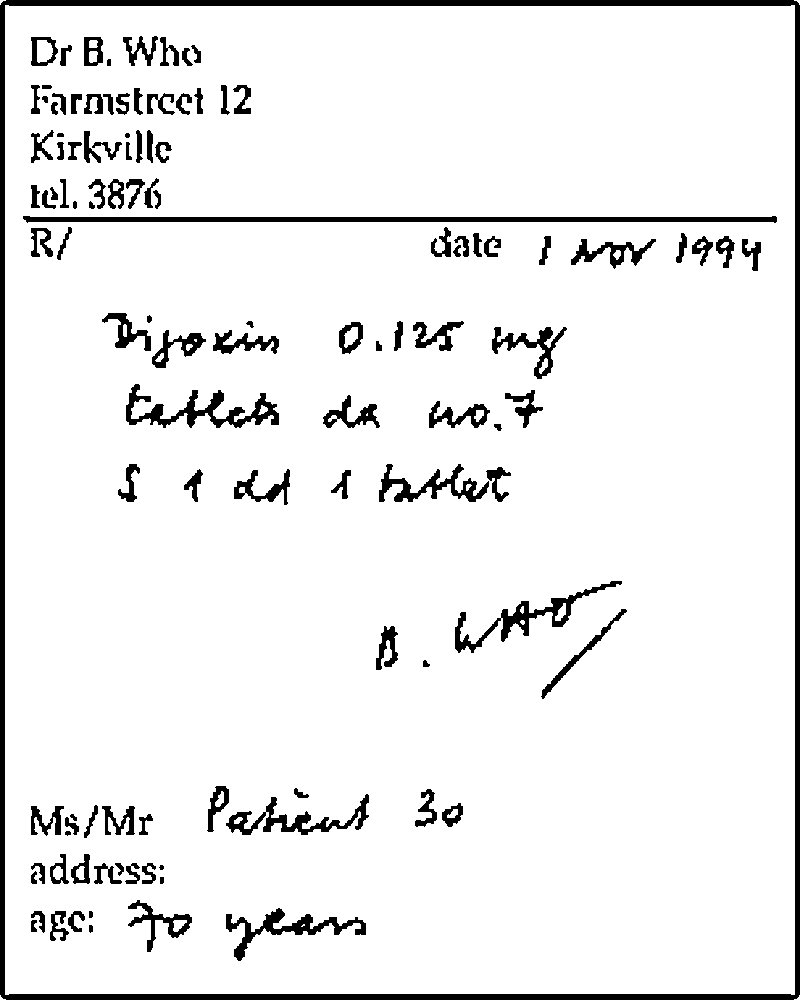

Processing (2/129): 10.jpg...
Processing (3/129): 100.jpg...
Processing (4/129): 101.jpg...
Processing (5/129): 102.jpg...
Processing (6/129): 103.jpg...
Processing (7/129): 104.jpg...
Processing (8/129): 105.jpg...
Processing (9/129): 106.jpg...
Processing (10/129): 107.jpg...
Processing (11/129): 108.jpg...
Processing (12/129): 109.jpg...
Processing (13/129): 11.jpg...
Processing (14/129): 110.jpg...
Processing (15/129): 111.jpg...
Processing (16/129): 112.jpg...
Processing (17/129): 113.jpg...
Processing (18/129): 114.jpg...
Processing (19/129): 115.jpg...
Processing (20/129): 116.jpg...
Processing (21/129): 117.jpg...
Processing (22/129): 118.jpg...
Processing (23/129): 119.jpg...
Processing (24/129): 12.jpg...
Processing (25/129): 120.jpg...
Processing (26/129): 121.jpg...
Processing (27/129): 122.jpg...
Processing (28/129): 123.jpg...
Processing (29/129): 124.jpg...
Processing (30/129): 125.jpg...
Processing (31/129): 126.jpg...
Processing (32/129): 127.jpg...
Processing (33/129)


### Preview of Processed Image: `27.jpg`

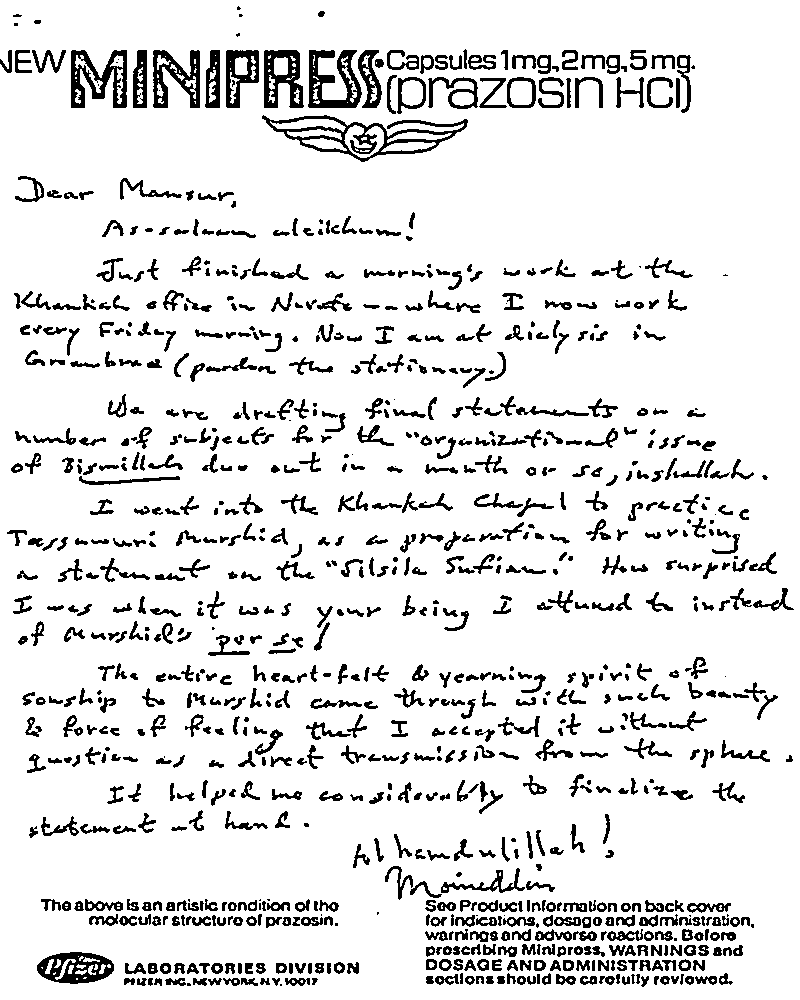

Processing (51/129): 28.jpg...
Processing (52/129): 29.jpg...
Processing (53/129): 3.jpg...
Processing (54/129): 30.jpg...
Processing (55/129): 31.jpg...
Processing (56/129): 32.jpg...
Processing (57/129): 33.jpg...
Processing (58/129): 34.jpg...
Processing (59/129): 35.jpg...
Processing (60/129): 36.jpg...
Processing (61/129): 37.jpg...
Processing (62/129): 38.jpg...
Processing (63/129): 39.jpg...
Processing (64/129): 4.jpg...
Processing (65/129): 40.jpg...
Processing (66/129): 41.jpg...
Processing (67/129): 42.jpg...
Processing (68/129): 43.jpg...
Processing (69/129): 44.jpg...
Processing (70/129): 45.jpg...
Processing (71/129): 46.jpg...
Processing (72/129): 47.jpg...
Processing (73/129): 48.jpg...
Processing (74/129): 49.jpg...
Processing (75/129): 5.jpg...
Processing (76/129): 50.jpg...
Processing (77/129): 51.jpg...
Processing (78/129): 52.jpg...
Processing (79/129): 53.jpg...
Processing (80/129): 54.jpg...
Processing (81/129): 55.jpg...
Processing (82/129): 56.jpg...
Processing 


### Preview of Processed Image: `72.jpg`

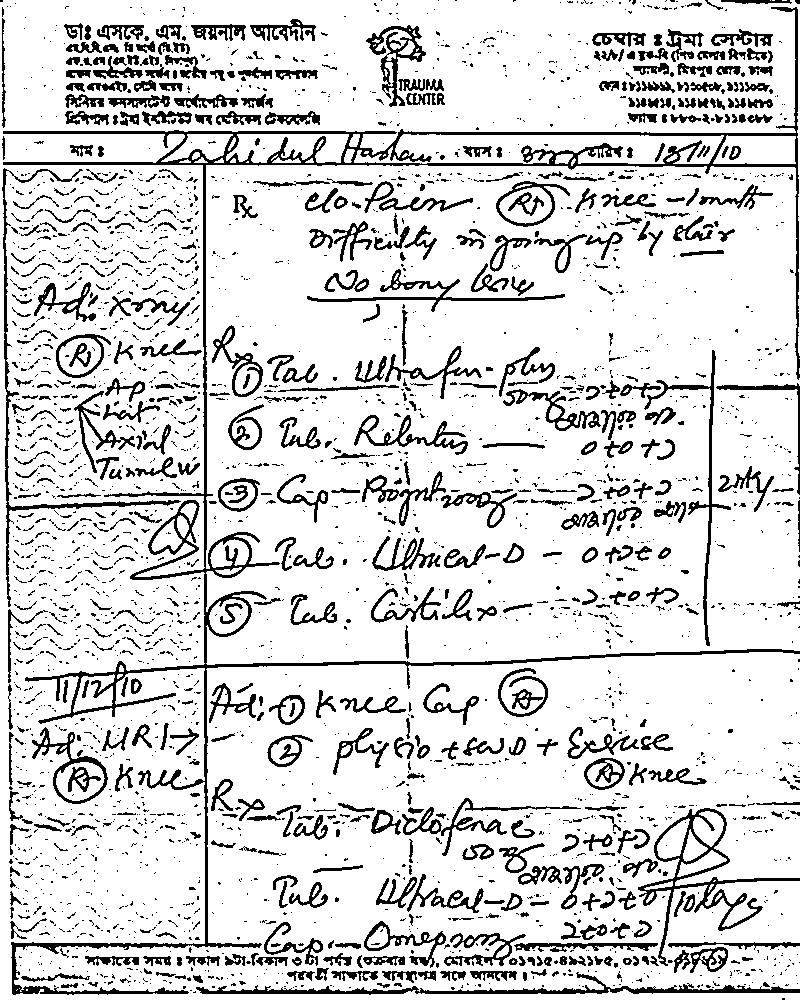

Processing (101/129): 73.jpg...
Processing (102/129): 74.jpg...
Processing (103/129): 75.jpg...
Processing (104/129): 76.jpg...
Processing (105/129): 77.jpg...
Processing (106/129): 78.jpg...
Processing (107/129): 79.jpg...
Processing (108/129): 8.jpg...
Processing (109/129): 80.jpg...
Processing (110/129): 81.jpg...
Processing (111/129): 82.jpg...
Processing (112/129): 83.jpg...
Processing (113/129): 84.jpg...
Processing (114/129): 85.jpg...
Processing (115/129): 86.jpg...
Processing (116/129): 87.jpg...
Processing (117/129): 88.jpg...
Processing (118/129): 89.jpg...
Processing (119/129): 9.jpg...
Processing (120/129): 90.jpg...
Processing (121/129): 91.jpg...
Processing (122/129): 92.jpg...
Processing (123/129): 93.jpg...
Processing (124/129): 94.jpg...
Processing (125/129): 95.jpg...
Processing (126/129): 96.jpg...
Processing (127/129): 97.jpg...
Processing (128/129): 98.jpg...
Processing (129/129): 99.jpg...



### Preview of Processed Image: `99.jpg`

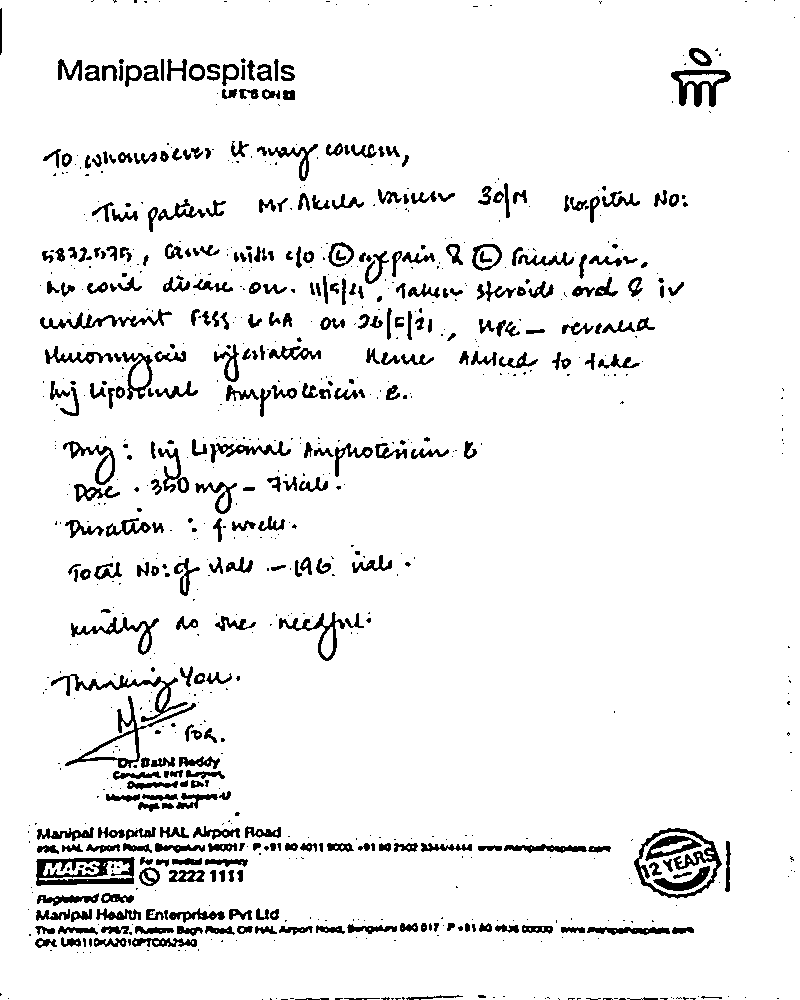

## ✅ Processing Complete!

All processed images saved to: processed_data


In [35]:
process_dataset(DATA_DIR, OUTPUT_DIR)
